In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("L:\TARUN\DATA SCIENCE\PROJECTS\MARKET BASKET ANALYSIS\Groceries_dataset.csv")
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [4]:
df.isnull().sum().sort_values(ascending=False)

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [5]:
df['Date']=pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


C:\Users\krsin\AppData\Local\Temp\ipykernel_15840\4257738098.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date']=pd.to_datetime(df['Date'])


In [6]:
df.head()

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-05-01,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-01-02,whole milk


<function matplotlib.pyplot.show(close=None, block=None)>

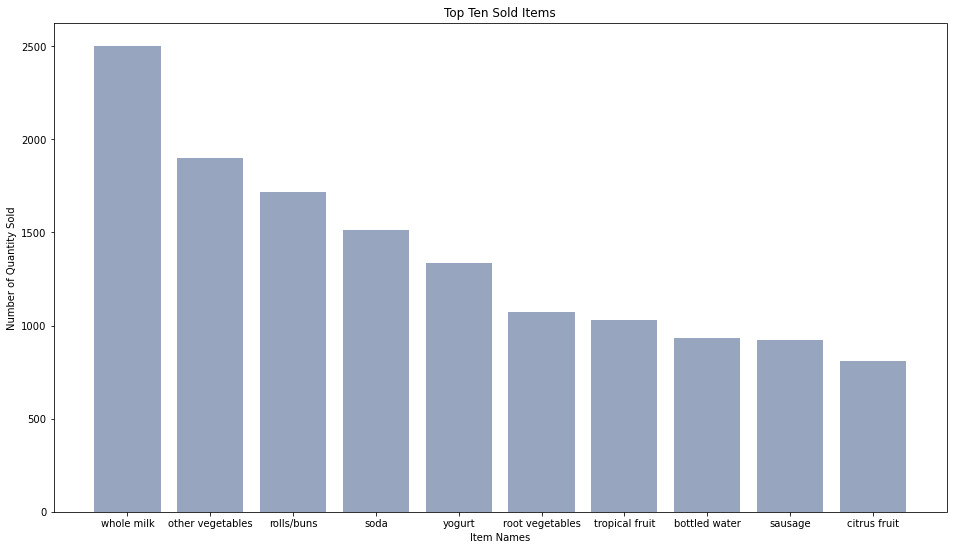

In [7]:
Item_distr = df.groupby(by='itemDescription').size().reset_index(name='Frequency').sort_values(by='Frequency',ascending=False).head(10)

bars=Item_distr['itemDescription']
height=Item_distr['Frequency']
x_pos=np.arange(len(bars))

plt.figure(figsize=(16,9))

plt.bar(x_pos, height, color=(0.2,0.3,0.5,0.5))
plt.title('Top Ten Sold Items')
plt.xlabel('Item Names')
plt.ylabel('Number of Quantity Sold')

plt.xticks(x_pos, bars)

plt.show

In [8]:
df_date=df.set_index(['Date'])
df_date

,Member_number,itemDescription
Date,,
2015-07-21,1808,tropical fruit
2015-05-01,2552,whole milk
2015-09-19,2300,pip fruit
2015-12-12,1187,other vegetables
2015-01-02,3037,whole milk
...,...,...
2014-08-10,4471,sliced cheese
2014-02-23,2022,candy
2014-04-16,1097,cake bar


[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Number of Items Sold')]

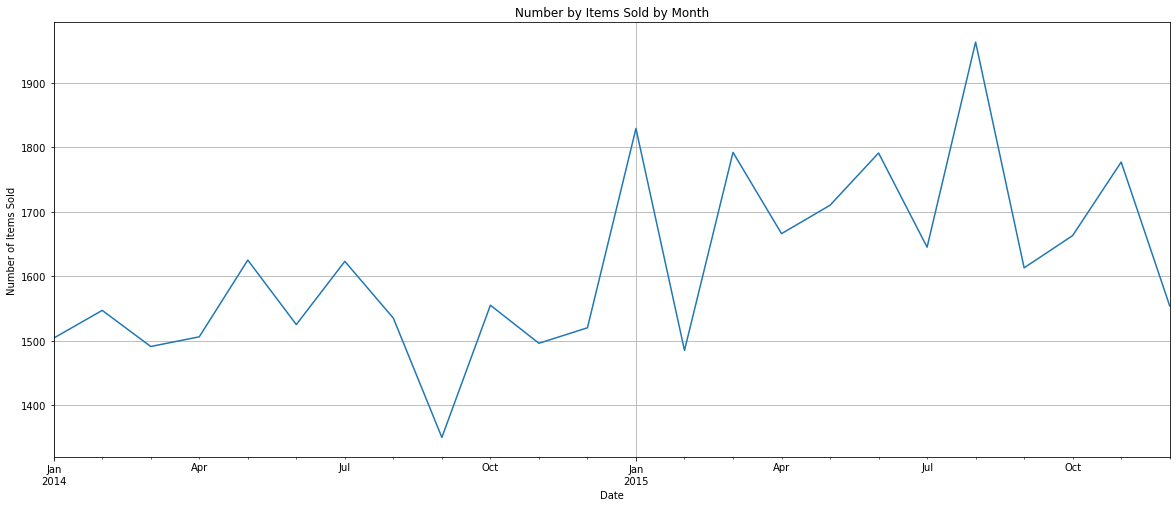

In [9]:
df_date.resample("M")['itemDescription'].count().plot(figsize = (20,8), grid = True, title = "Number by Items Sold by Month").set(xlabel = "Date", ylabel = "Number of Items Sold")

In [10]:
cust_level=df[['Member_number', 'itemDescription']].sort_values(by='Member_number', ascending=False)
cust_level['itemDescription']=cust_level['itemDescription'].str.strip()
cust_level

,Member_number,itemDescription
3578,5000,soda
34885,5000,semi-finished bread
11728,5000,fruit/vegetable juice
9340,5000,bottled beer
19727,5000,root vegetables
...,...,...
13331,1000,whole milk
17778,1000,pickled vegetables
6388,1000,sausage
20992,1000,semi-finished bread


In [11]:
transactions=[a[1]['itemDescription'].tolist() for a in list (cust_level.groupby(['Member_number']))]

C:\Users\krsin\AppData\Local\Temp\ipykernel_15840\4237715519.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  transactions=[a[1]['itemDescription'].tolist() for a in list (cust_level.groupby(['Member_number']))]


In [12]:
from apyori import apriori
rules=apriori(transactions=transactions,min_support=0.002,min_confidence=0.05,min_lift=3,min_length=2)

In [13]:
results=list(rules)

In [14]:
results

[RelationRecord(items=frozenset({'kitchen towels', 'UHT-milk'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'kitchen towels'}), items_add=frozenset({'UHT-milk'}), confidence=0.30000000000000004, lift=3.821568627450981)]),
 RelationRecord(items=frozenset({'potato products', 'beef'}), support=0.002565418163160595, ordered_statistics=[OrderedStatistic(items_base=frozenset({'potato products'}), items_add=frozenset({'beef'}), confidence=0.4545454545454546, lift=3.8021849395239955)]),
 RelationRecord(items=frozenset({'canned fruit', 'coffee'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'canned fruit'}), items_add=frozenset({'coffee'}), confidence=0.4285714285714286, lift=3.7289540816326534)]),
 RelationRecord(items=frozenset({'domestic eggs', 'meat spreads'}), support=0.0035915854284248334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'meat spreads'}), items_add=frozenset({'domestic egg

In [21]:
def inspect(results):
    lhs=[tuple(result[2][0][0])[0] for result in results]
    rhs=[tuple(result[2][0][1])[0] for result in results]
    supports=[results[1] for result in results]
    confidences=[result[2][0][2] for result in results]
    lifts=[result[2][0][3] for result in results]
    return list (zip(lhs,rhs,supports,confidences,lifts))
resultsindataframe=pd.DataFrame(inspect(results),columns=['Left Hand Side', 'Right Hand Side', 'Support', 'Confidences', 'Lift'])

In [22]:
resultsindataframe.nlargest(n=10, columns='Lift')

,Left Hand Side,Right Hand Side,Support,Confidences,Lift
4915,bottled water,pip fruit,"((potato products, beef), 0.002565418163160595...",0.105263,14.654135
4914,bottled water,pip fruit,"((potato products, beef), 0.002565418163160595...",0.105263,12.068111
2674,oil,pork,"((potato products, beef), 0.002565418163160595...",0.242424,11.524021
3573,citrus fruit,specialty chocolate,"((potato products, beef), 0.002565418163160595...",0.073394,11.443670
4133,citrus fruit,rolls/buns,"((potato products, beef), 0.002565418163160595...",0.148148,11.105413
3290,bottled water,citrus fruit,"((potato products, beef), 0.002565418163160595...",0.150943,10.322410
2904,brown bread,other vegetables,"((potato products, beef), 0.002565418163160595...",0.097826,9.533152
5045,bottled water,whole milk,"((potato products, beef), 0.002565418163160595...",0.135593,9.438257
2902,brown bread,pastry,"((potato products, beef), 0.002565418163160595...",0.086957,9.415459
2734,bottled water,brown bread,"((potato products, beef), 0.002565418163160595...",0.118421,9.232105
